In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/miglesia/anaconda2/envs/my_pymc_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
gdf = gpd.read_file(driver = 'ESRI Shapefile', filename = './Radios_censales/radios_w_geometry.shp')
gdf['densidad'] = gdf.POBLACION_/(gdf.Shape__Are/1e6)

In [214]:
gdf = gdf.sort_values(by = 'densidad', ascending = False)
# n = 2
# gdf['urban_quantile'] = np.ceil(n * gdf['POBLACION_'].cumsum()/(gdf['POBLACION_'].sum()))/float(n)
gdf['urban_quantile'] = gdf['POBLACION_'].cumsum()/(gdf['POBLACION_'].sum()) > .92

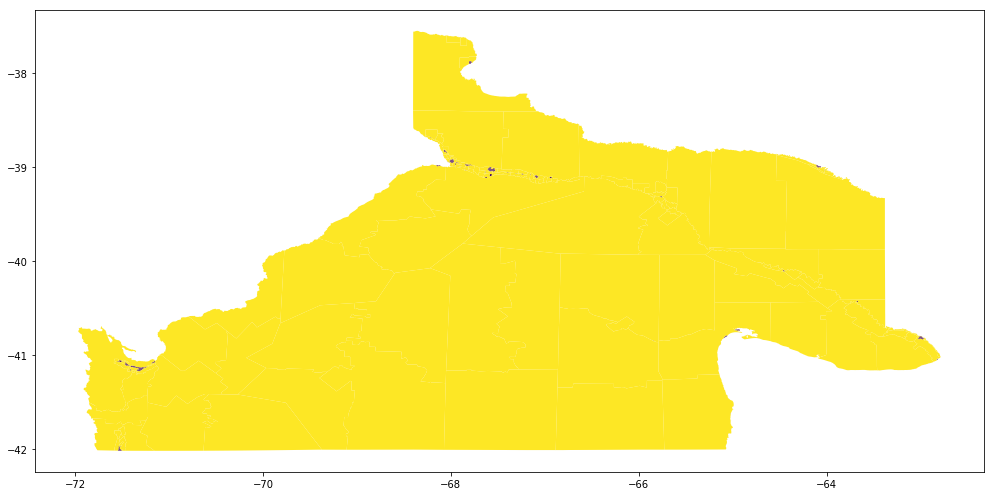

In [215]:
# ax = gdf.loc[gdf.PROVINCIA.isin(['BUENOS AIRES', 'CIUDAD DE BUENOS AIRES'])].plot(column = 'urban_quantile', figsize = (15, 15))
ax = gdf.loc[gdf.PROVINCIA == u'RIO NEGRO'].plot(column = 'urban_quantile', figsize = (17, 40))
# ax.set_xlim(-59.5, -57.5)
# ax.set_ylim(-35.5, -33.5)

In [216]:
gdf['centroid'] = gdf.geometry.centroid

In [217]:
data = gdf.loc[~gdf.urban_quantile][['LINK', 'POBLACION_', 'PROVINCIA', 'centroid','geometry']]
data['geometry'] = data['geometry'].buffer(.0005)


In [59]:
data_ = data.loc[data.PROVINCIA == 'CIUDAD DE BUENOS AIRES']
# import itertools
# geoms = data_['geometry'].tolist()
# intersection_iter = gpd.GeoDataFrame(gpd.GeoSeries([poly[0].union(poly[1]) for poly in  itertools.combinations(geoms, 2) if poly[0].intersects(poly[1])]), columns=['geometry'])
# # intersection_iter.to_file("intersection_iter.shp") 
# union_iter = intersection_iter.unary_union

(-31.7, -31.2)

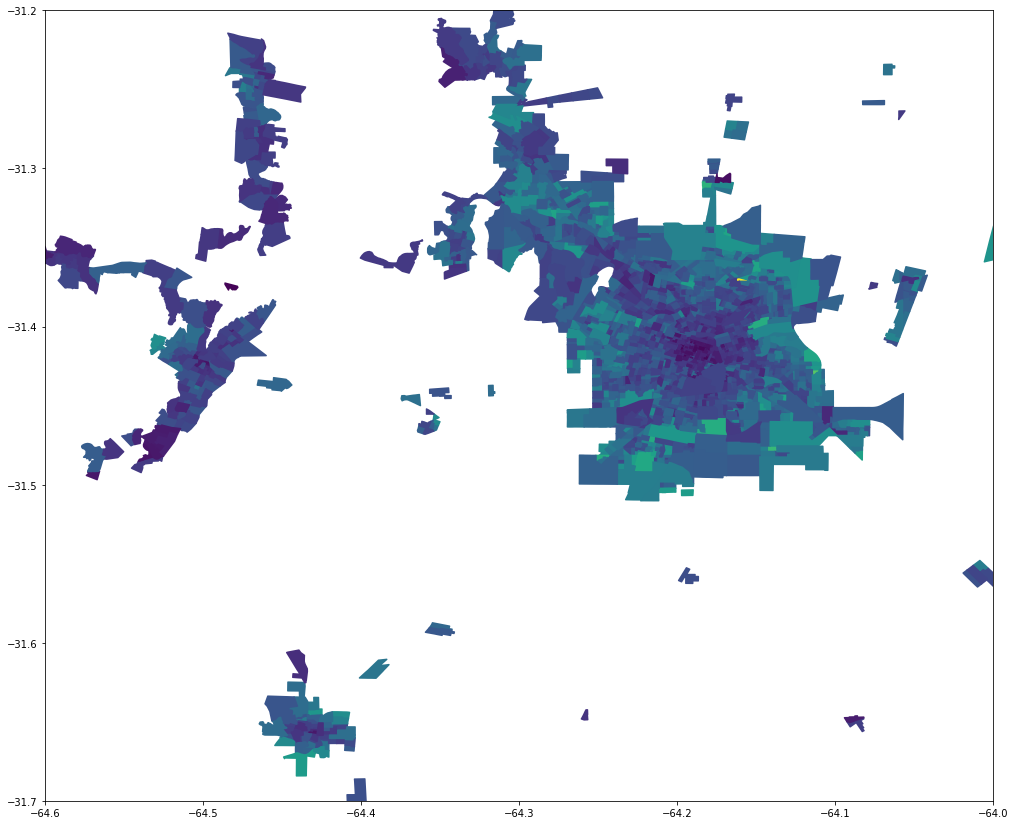

In [262]:
data.loc[data.PROVINCIA == u'CORDOBA'].plot(column = 'POBLACION_', figsize = (17, 40))
plt.xlim(-64.6, -64)
plt.ylim(-31.7, -31.2)

(-35, -34.3)

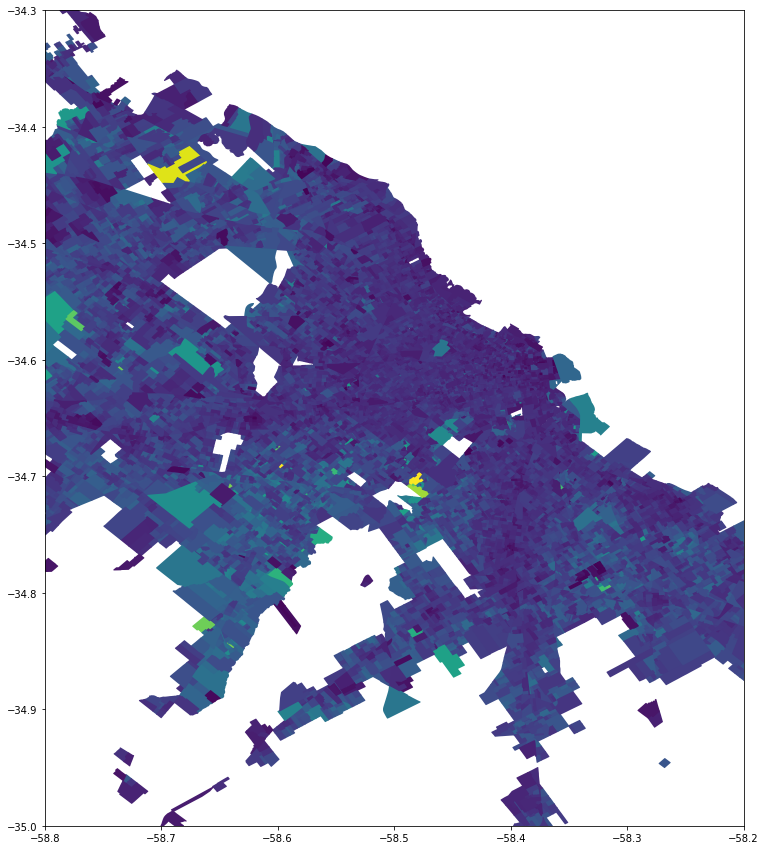

In [268]:
data.plot(column = 'POBLACION_', figsize = (15, 15))
plt.xlim(-58.8, -58.2)
plt.ylim(-35, -34.3)

In [220]:
x = data['geometry'].unary_union
len(x)

2200

In [82]:
# data_ = data.loc[data.PROVINCIA == u'BUENOS AIRES']#.loc[data.PROVINCIA == u'TUCUMÁN']
# x_ = data_['geometry'].unary_union

In [221]:
Polygons = list(x)
df = gpd.GeoDataFrame(Polygons, columns = ['AGLOS'])
df.index = df.index + 1 # avoid index 0
# 200 largest AGLOS. They are likely to contain the largest populations as well.
large_aglos = gpd.GeoSeries(df.AGLOS).area.sort_values(ascending = True).tail(200).index

In [85]:
# np.argmin(np.linalg.norm(np.array([[p.x, p.y] for p in gpd.GeoSeries(df.AGLOS).centroid]) + np.array([64.2, + 31.4]), axis = 1))

1451

In [97]:
# gpd.GeoSeries(df.AGLOS)[971].area

0.0004960123014801761

In [99]:
# print(large_aglos)

Int64Index([ 971, 1291, 1408,  240, 1224,  513,  469, 1105,  934,  510,
            ...
            1200, 1096,  868,  242,  376, 1343,  658,  877, 1452, 1462],
           dtype='int64', length=200)


In [ ]:
# gpd.GeoSeries(df.AGLOS)[1452]

In [112]:

# for p in data['centroid']:
#     inters += [Polygons[1451].intersects(p)]
# # data[i] = inters

In [180]:
# sum(inters)
#'centroid']
inters = []
for p in data.loc[data.PROVINCIA == 'CORDOBA']['centroid']:
    inters += [Polygons[i].intersects(p)]

In [176]:
sum(inters)

1394

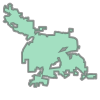

In [173]:
Polygons[1451]

In [222]:
for i in large_aglos:
    print(i)
    inters = []
    for p in data['centroid']:
        inters += [Polygons[i - 1].intersects(p)]
    data[i] = inters

38
979
21
410
2121
463
1711
1008
1585
423
1735
1647
276
262
1897
830
1829
1714
1516
1102
1089
676
1363
925
474
1641
1885
1808
125
1393
1833
780
215
408
503
128
304
1608
1417
435
956
1573
368
26
60
1848
643
25
802
610
1215
625
247
864
963
919
1893
996
351
395
1416
682
1563
656
523
1834
639
1713
846
1741
61
2055
856
1257
1087
1698
526
428
854
650
1147
1712
2114
1725
1553
761
1740
216
1986
1568
646
1044
370
438
1846
1418
2023
188
1742
1905
1321
1597
1482
1146
175
323
68
11
1554
2160
211
1715
1794
834
1497
5
1480
1099
1569
50
1743
2022
315
871
1461
291
1426
161
341
28
81
401
484
1914
495
1097
641
1566
1329
2
2072
723
132
869
1745
509
680
1161
596
1021
779
412
562
1271
518
13
1731
1567
1700
585
1887
598
317
1931
41
312
137
189
342
2112
887
1320
705
886
1019
1732
1263
1954
591
855
214
1502
62
1699
1152
1721
2190
2117
192
1739
2189
1672
524
1892
563
1264
1169
1733
1170
2197


In [223]:
data['AGLO_id'] = (data.select_dtypes('bool')*large_aglos).sum(1)

In [204]:
# data.select_dtypes(exclude = 'bool').groupby('AGLO_id').agg({'POBLACION_': 'sum', 'PROVINCIA': 'first'}).sort_values(by = 'POBLACION_', ascending = False)

In [205]:
# large_aglos[-10:]
# data.loc[data.AGLO_id == 1452]

In [224]:
radio_depto = pd.read_csv('./Radios_censales/radio_depto.csv')[['radio', 'departamen']]
radio_depto['LINK'] = radio_depto.radio.astype(str).str.zfill(9)
gdf = gdf.merge(radio_depto)

In [247]:
gdf_ = gdf.merge(data[['LINK', 'AGLO_id']])
large_aglos_pop = gdf_.groupby('AGLO_id')['POBLACION_'].sum().sort_values(ascending = False).head(200).index
# ax = gdf.loc[gdf.PROVINCIA == u'RIO NEGRO'].plot(column = 'urban_quantile', figsize = (17, 40))
prov = gdf_.groupby('AGLO_id')['PROVINCIA'].apply(lambda x: x.unique())
prov.index = prov.index.get_level_values(0)
dpto = gdf_.groupby('AGLO_id')['departamen'].apply(lambda x: x.unique())
dpto.index = dpto.index.get_level_values(0)
pob = gdf_.groupby('AGLO_id')['POBLACION_'].sum()

In [207]:
for i in large_aglos_pop:
    print(prov[i])
    print(dpto[i])
    print(pob[i])
    gdf_.loc[gdf_.AGLO_id == i].plot(column = 'urban_quantile', figsize = (10, 10))
    plt.show()

In [250]:
pd.options.display.max_rows = 200

In [254]:
result = pd.concat([prov.loc[large_aglos_pop], dpto.loc[large_aglos_pop], pob.loc[large_aglos_pop]], axis = 1).head(150).reset_index(drop = True)

In [261]:
result.to_csv('./ciudades_ARG.csv')

In [259]:
result.sum() - 6103115

POBLACION_    30289184
dtype: int64